In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn import decomposition, preprocessing
from IPython.display import display
import matplotlib.cm as cm

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('all.csv')

In [3]:
df.columns

Index([u'benchmark', u'machine', u'repetition', u'test', u'result'], dtype='object')

In [4]:
df

,benchmark,machine,repetition,test,result
0,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,af-alg,7.553477e+03
1,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,atomic,6.997670e+05
2,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,bigheap,3.521001e+04
3,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,brk,6.847354e+05
4,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,bsearch,3.703138e+02
5,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,cache,3.399998e+00
6,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,cpu,2.698333e+02
7,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,crypt,1.578310e+02
8,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,full,2.808373e+05
9,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,heapsort,4.499998e+00


In [5]:
len(df.index)

3043

In [6]:
df.dropna(inplace=True)

In [7]:
len(df.index)

2982

In [8]:
df.benchmark.unique()

array(['stressng', 'ssca', 'hpccg', 'scikit-learn', 'redisbench'], dtype=object)

In [9]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'ssca', 'hpccg', 'sklearn', 'SET', 'GET',
       'LPUSH', 'LPOP'], dtype=object)

In [10]:
# pivot table to obtain features, where each microbenchmark is a feature
features = df.pivot_table(index=["machine","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

In [11]:
# flatten the index
cols = features.columns.get_level_values(1).values
cols[0] = 'machine'
features.columns = cols
features.dropna(inplace=True)

In [12]:
features

,machine,GET,LPOP,LPUSH,SET,af-alg,atomic,bigheap,brk,bsearch,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,392208.633333,406386.396667,378604.746667,325070.280000,7663.311891,701271.723530,35615.516902,678083.597320,371.870045,...,0.0,5.530900,20829.375419,14.539352,16.937784,988.200779,34698.398128,117.421543,591135.542215,711894.039632
1,c220g2.quiho.schedock-PG0.wisc.cloudlab.us,398809.970000,403091.656667,423516.980000,352865.970000,7647.461968,689902.285469,35925.222170,695431.857402,367.863497,...,0.0,5.597356,20836.632301,14.442480,17.193429,990.635509,34702.495019,117.800057,601473.177997,703925.810687
2,c6220.quiho.schedock-PG0.apt.emulab.net,364951.843333,381658.853333,377659.093333,355068.346667,11027.751698,562825.057815,11147.487395,246881.263891,317.888015,...,0.0,162.470348,16301.664766,11.721960,14.977933,873.443190,31403.634194,139.572951,514712.219239,589418.066573
3,c6320.quiho.schedock-PG0.clemson.cloudlab.us,243886.723333,251236.793333,247624.700000,242909.946667,7742.722711,452111.675773,28588.669841,507686.565611,251.348004,...,0.0,3.764678,12707.220323,7.503501,11.435886,712.153003,31200.500141,103.595241,408448.747905,429883.257501
4,c8220.quiho.schedock-PG0.clemson.cloudlab.us,241327.046667,250617.100000,247726.243333,241099.240000,7501.174397,451842.702865,27064.869480,513434.564822,251.371628,...,0.0,3.865097,12827.136031,6.130230,11.848567,711.553491,31200.049779,102.722602,415778.527625,428512.817802
5,d2100.quiho.Schedock.emulab.net,351036.313333,405150.656667,392420.373333,326927.083333,7492.364100,683392.313297,37139.648446,714448.712058,360.337877,...,0.0,344.952456,20948.783110,14.407979,16.206002,972.560739,34699.639251,117.009924,581652.738471,701159.549830
6,d430.quiho.Schedock.emulab.net,375417.503333,383836.166667,390630.083333,337549.930000,7634.930650,684959.994076,36245.060639,715683.789908,365.466211,...,0.0,348.818426,20734.079313,14.440323,15.882631,948.930473,34702.410522,115.546668,584807.468790,700548.643468
7,d530.quiho.Schedock.emulab.net,373860.166667,380026.070000,363307.413333,318420.186667,7477.499107,692597.055823,36441.684183,701184.104880,362.755616,...,0.0,354.185724,20936.068054,14.227316,16.132366,950.324667,34698.514583,116.419912,587392.129631,708319.444106
8,d710.quiho.Schedock.emulab.net,342000.933333,365837.290000,378648.383333,328665.376667,7573.790669,703972.146336,36679.103923,701394.651892,358.575204,...,0.0,347.619575,20052.966460,14.083584,15.904268,954.142787,34703.166999,116.230983,573584.885035,724785.077376
9,d820.quiho.Schedock.emulab.net,386629.603333,405338.970000,385786.603333,338208.363333,7445.856239,699268.009111,37068.332234,696310.018018,365.228100,...,0.0,349.751864,20347.355285,14.288036,15.999467,980.890323,34701.002241,117.621891,586001.563229,719887.654252


In [13]:
features.columns.values

array(['machine', 'GET', 'LPOP', 'LPUSH', 'SET', 'af-alg', 'atomic',
       'bigheap', 'brk', 'bsearch', 'cache', 'cpu', 'crypt', 'full',
       'heapsort', 'hpccg', 'hsearch', 'icache', 'lockbus', 'longjmp',
       'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore', 'mmap',
       'mremap', 'msync', 'nop', 'numa', 'oom-pipe', 'opcode', 'qsort',
       'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'sklearn', 'ssca',
       'stack', 'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm',
       'vm-rw', 'vm-splice', 'zero'], dtype=object)

In [14]:
# get features that we'll use
feature_columns = pd.Index(df.query('benchmark == "stressng"')['test'].unique())
# remove af-alg,brk,bigheap and lockbus since it messes up training
feature_columns = feature_columns.difference(['af-alg','brk','bigheap','lockbus'])

In [15]:
len(feature_columns)

38

In [16]:
feature_columns

Index([u'atomic', u'bsearch', u'cache', u'cpu', u'crypt', u'full', u'heapsort',
       u'hsearch', u'icache', u'longjmp', u'lsearch', u'malloc', u'matrix',
       u'memcpy', u'mincore', u'mmap', u'mremap', u'msync', u'nop', u'numa',
       u'oom-pipe', u'opcode', u'qsort', u'remap', u'resources', u'rmap',
       u'shm', u'shm-sysv', u'stack', u'stackmmap', u'str', u'stream',
       u'tsearch', u'vecmath', u'vm', u'vm-rw', u'vm-splice', u'zero'],
      dtype='object')

In [17]:
# what we can learn
features.columns.difference(feature_columns)

Index([u'GET', u'LPOP', u'LPUSH', u'SET', u'af-alg', u'bigheap', u'brk',
       u'hpccg', u'lockbus', u'machine', u'sklearn', u'ssca'],
      dtype='object')

In [18]:
features[feature_columns]

,atomic,bsearch,cache,cpu,crypt,full,heapsort,hsearch,icache,longjmp,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,701271.723530,371.870045,3.533330,266.631682,160.684875,291520.994009,4.633322,4006.841201,991.602615,111296.415967,...,0.0,5.530900,20829.375419,14.539352,16.937784,988.200779,34698.398128,117.421543,591135.542215,711894.039632
1,689902.285469,367.863497,3.866654,268.820311,157.683999,295648.916005,4.633330,4017.709984,992.278050,114349.766074,...,0.0,5.597356,20836.632301,14.442480,17.193429,990.635509,34702.495019,117.800057,601473.177997,703925.810687
2,562825.057815,317.888015,3.933333,199.419482,105.106411,179632.285134,3.599520,3356.035463,863.949867,83732.470842,...,0.0,162.470348,16301.664766,11.721960,14.977933,873.443190,31403.634194,139.572951,514712.219239,589418.066573
3,452111.675773,251.348004,2.999984,175.694228,106.632361,133400.113107,2.899989,2752.771892,677.130943,64478.290917,...,0.0,3.764678,12707.220323,7.503501,11.435886,712.153003,31200.500141,103.595241,408448.747905,429883.257501
4,451842.702865,251.371628,2.966650,175.736272,106.729748,133892.948251,2.866663,2751.299542,675.479348,64388.762519,...,0.0,3.865097,12827.136031,6.130230,11.848567,711.553491,31200.049779,102.722602,415778.527625,428512.817802
5,683392.313297,360.337877,3.499967,264.615116,156.000895,220483.922514,4.533328,3942.239646,949.738935,110316.290039,...,0.0,344.952456,20948.783110,14.407979,16.206002,972.560739,34699.639251,117.009924,581652.738471,701159.549830
6,684959.994076,365.466211,3.533309,263.612133,159.501680,220795.471594,4.633331,4008.178865,975.334295,114101.770370,...,0.0,348.818426,20734.079313,14.440323,15.882631,948.930473,34702.410522,115.546668,584807.468790,700548.643468
7,692597.055823,362.755616,3.399990,267.034150,157.663529,217799.073947,4.633330,3973.465249,984.475989,113668.340304,...,0.0,354.185724,20936.068054,14.227316,16.132366,950.324667,34698.514583,116.419912,587392.129631,708319.444106
8,703972.146336,358.575204,3.466656,263.144162,156.994424,215955.885369,4.566658,3863.347692,988.314200,113772.367027,...,0.0,347.619575,20052.966460,14.083584,15.904268,954.142787,34703.166999,116.230983,573584.885035,724785.077376
9,699268.009111,365.228100,3.466655,259.929087,151.859630,219505.820525,4.566664,3883.542665,976.751122,113308.107233,...,0.0,349.751864,20347.355285,14.288036,15.999467,980.890323,34701.002241,117.621891,586001.563229,719887.654252


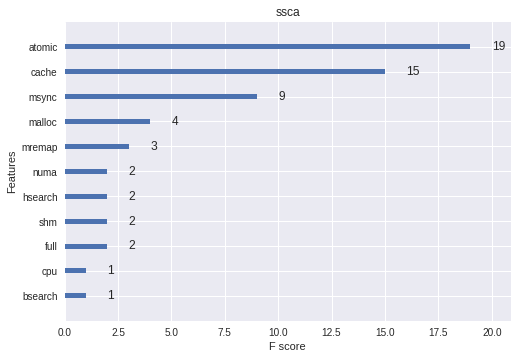

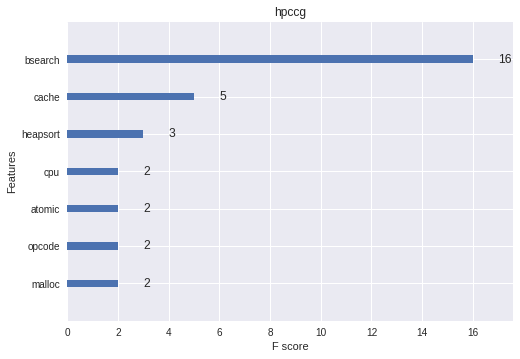

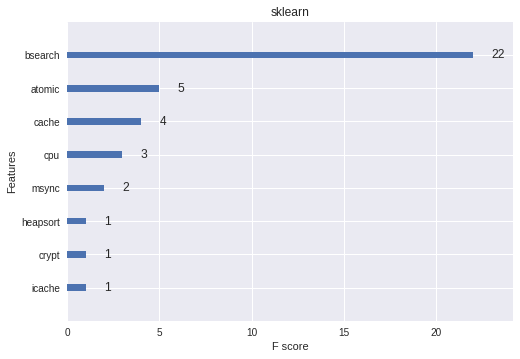

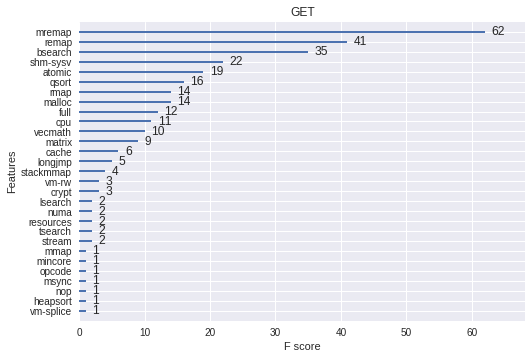

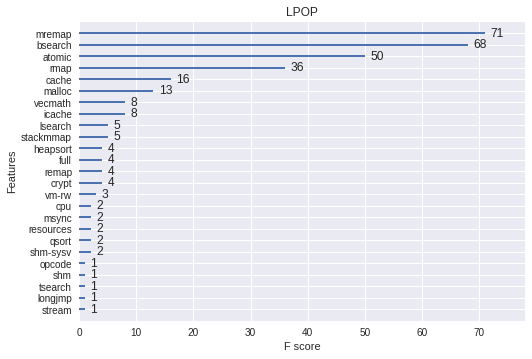

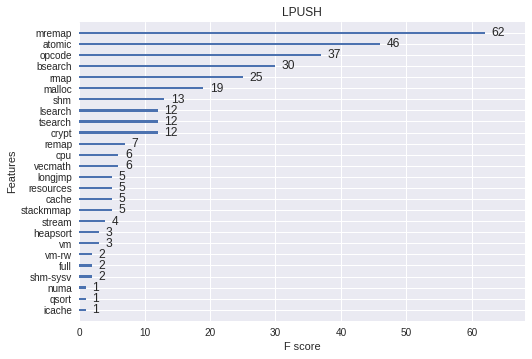

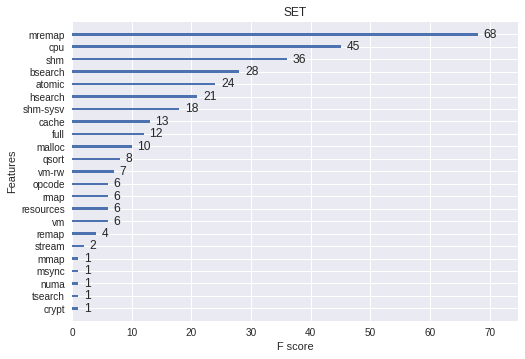

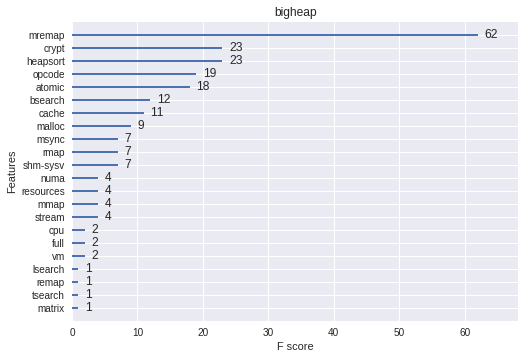

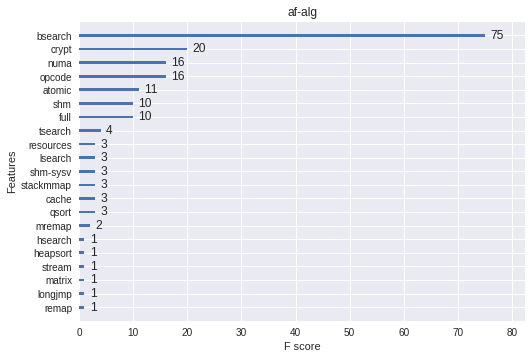

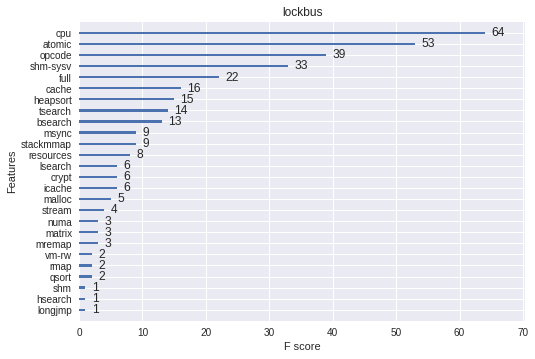

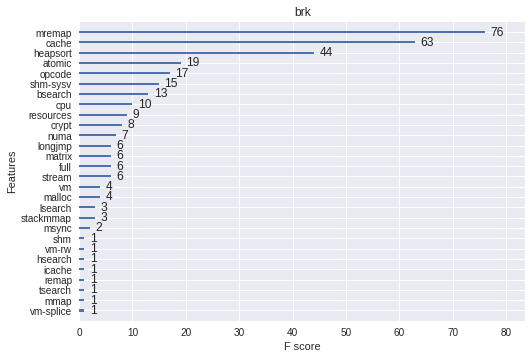

In [19]:
for b in ['ssca', 'hpccg', 'sklearn', 'GET', 'LPOP', 'LPUSH', 'SET', 'bigheap','af-alg','lockbus','brk']:
    T_train_xgb = xgb.DMatrix(features[feature_columns], features[b])
    params = {'bst:max_depth':6, 'bst:eta':1, 'gamma':15, 'objective':'reg:linear'}
    #params = {'bst:max_depth':6, 'bst:eta':1, 'gamma':15, 'booster':'gblinear', 'objective':'reg:linear' }
    params['nthread'] = 4
    params['eval_metric'] = 'mae'
    num_rounds=100
    gbm = xgb.train(params,T_train_xgb,num_rounds)
    xgb.plot_importance(gbm)
    #xgb.plot_tree(gbm)
    plt.title(b)
    plt.show()

In [20]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary
def screeplot(pca, standardised_values):
    y = np.std(pca.fit_transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

In [21]:
normfeatures = preprocessing.scale(features[feature_columns])
factors = decomposition.PCA().fit(normfeatures)
summary = pca_summary(factors, normfeatures)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,5.243378e+00,7.636948e-01,0.763695
PC2,1.686368e+00,7.899544e-02,0.842690
PC3,1.280741e+00,4.556378e-02,0.888254
PC4,1.245679e+00,4.310322e-02,0.931357
PC5,9.573271e-01,2.545764e-02,0.956815
PC6,7.353528e-01,1.502066e-02,0.971836
PC7,6.508796e-01,1.176790e-02,0.983603
PC8,5.703165e-01,9.035025e-03,0.992639
PC9,3.249789e-01,2.933646e-03,0.995572


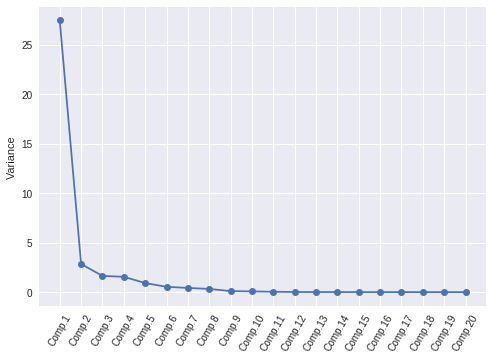

In [22]:
screeplot(factors, normfeatures)

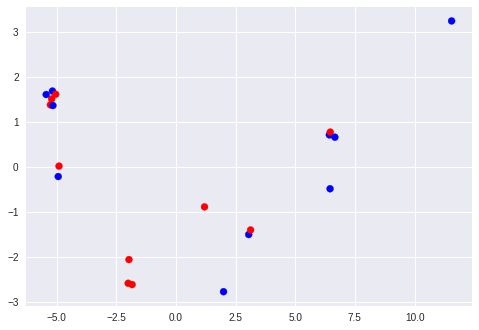

In [23]:
X_factor = factors.fit_transform(normfeatures)
plt.scatter(X_factor[:,0], X_factor[:,1], c=['red','blue'])

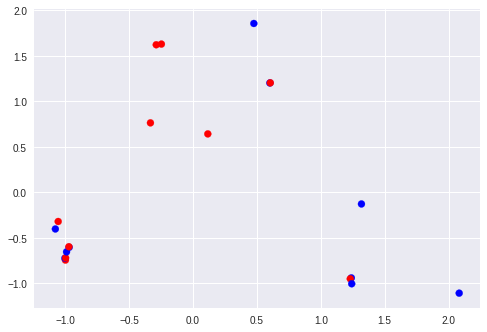

In [24]:
fa = decomposition.FactorAnalysis(n_components=2)
X_factor = fa.fit_transform(normfeatures)
plt.scatter(X_factor[:,0], X_factor[:,1], c=['red','blue'])